In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data = keras.datasets.imdb

In [3]:
# (x_train, y_train), (x_test, y_test) = data.load_data()
(x_train, y_train), (x_test, y_test) = data.load_data(num_words=10000)

In [4]:
x_train.shape

(25000,)

In [5]:
# pad the sentences so that the lengths are the same
x_train = keras.preprocessing.sequence.pad_sequences(x_train, 300)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, 300)

In [6]:
x_train.shape

(25000, 300)

In [7]:
model = keras.Sequential()
# after embedding, the shape of x_train will become (25000, 300, 50), before is (25000, 300)
# which means each of the 300 words become a 50 dim vector
model.add(layers.Embedding(10000, 50, input_length=300))
# since fully connected layers cannot handle 3-dim data, need to flatten
# after Flatten, it becomes (25000, 300*50)
# better use: 
# model.add(layers.GlobalAveragePooling1D())
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 50)           500000    
_________________________________________________________________
flatten (Flatten)            (None, 15000)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1920128   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,420,257
Trainable params: 2,420,257
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['acc'])

In [10]:
history = model.fit(x_train, y_train, epochs=15, batch_size=256, validation_data=(x_test, y_test))

W0802 03:14:05.384878  2440 deprecation.py:323] From D:\work\Python\Python37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 3s 133us/sample - loss: 0.5050 - acc: 0.7256 - val_loss: 0.3059 - val_acc: 0.8695
Epoch 2/15
25000/25000 [==============================] - 3s 108us/sample - loss: 0.1637 - acc: 0.9417 - val_loss: 0.3149 - val_acc: 0.8663
Epoch 3/15
25000/25000 [==============================] - 3s 108us/sample - loss: 0.0402 - acc: 0.9925 - val_loss: 0.3672 - val_acc: 0.8645
Epoch 4/15
25000/25000 [==============================] - 3s 110us/sample - loss: 0.0088 - acc: 0.9991 - val_loss: 0.3926 - val_acc: 0.8706
Epoch 5/15
25000/25000 [==============================] - 3s 109us/sample - loss: 0.0028 - acc: 1.0000 - val_loss: 0.4216 - val_acc: 0.8701
Epoch 6/15
25000/25000 [==============================] - 3s 109us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 0.4418 - val_acc: 0.8708
Epoch 7/15
25000/25000 [==============================] - 3s 111us/sample - loss: 9.6092e-04 - acc: 1.0000 - v

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

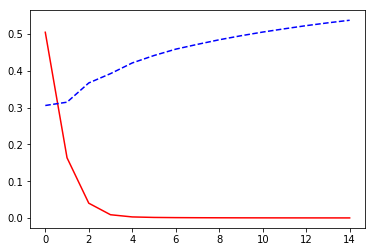

In [15]:
plt.plot(history.epoch, history.history['loss'], 'r')
plt.plot(history.epoch, history.history['val_loss'], 'b--')